In [1]:
#Run preprocessing Notebook
#To see the sets in preprocessing please view preprocessing notebook
%run hpp_preprocessing.ipynb
#The variables we would use from this notebook are featuresNormalized (contains all features normalized) & dfp (normalized dataframe)


A Confirmation that all columns and cells are completely filled,there are no empty cells and data is in exact type :

feature_name          numbe_of_missing_values
LSOAcode2011                                             0
LSOAname                                                 0
YearendingDec1995                                        0
YearendingDec1996                                        0
YearendingDec1997                                        0
YearendingDec1998                                        0
YearendingDec1999                                        0
YearendingDec2000                                        0
YearendingDec2001                                        0
YearendingDec2002                                        0
YearendingDec2003                                        0
YearendingDec2004                                        0
YearendingDec2005                                        0
YearendingDec2006                                        0
Yearendin

In [2]:
featuresForKMeans = [item for item in featuresNormalized if not item.startswith('Yearending')]
print("the features for kmeans model are :\n")
print(featuresForKMeans)
#I am expecting all coloumns ending with _n other than the label because kmeans is unsupervised

the features for kmeans model are :

['IndexofMultipleDeprivationIMDScore_n', 'IncomeScorerate_n', 'EmploymentScorerate_n', 'EducationSkillsandTrainingScore_n', 'HealthDeprivationandDisabilityScore_n', 'CrimeScore_n', 'BarrierstoHousingandServicesScore_n', 'LivingEnvironmentScore_n', 'IncomeDeprivationAffectingChildrenIndexIDACIScorerate_n', 'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate_n', 'ChildrenandYoungPeopleSubdomainScore_n', 'AdultSkillsSubdomainScore_n', 'GeographicalBarriersSubdomainScore_n', 'WiderBarriersSubdomainScore_n', 'IndoorsSubdomainScore_n', 'OutdoorsSubdomainScore_n']


In [30]:
#Selecting the optimal K we use elbow method
#This function helps to produce the elbow plot
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def evaluate_k_means_elbow_method(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init=10,random_state=80)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Find the elbow point
    deltas = np.diff(inertias, 2)
    elbow_index = np.argmax(deltas) + 2  # Add 2 due to zero indexing

    # Generate the elbow plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, 'o-')
    ax.plot(elbow_index, inertias[elbow_index - 1], marker='o', markersize=8, label='Elbow Point', color='red')
    ax.set_xlabel('Number of Clusters (K)')
    ax.set_ylabel('WCSS (Within-Cluster Sum of Square)')
    ax.grid(True)
    ax.legend()
    de = pd.DataFrame({'Number of Clusters (K)': means, 'WCSS (Within-Cluster Sum of Square)': inertias})
    print(de)
    plt.show()

    Number of Clusters (K)  WCSS (Within-Cluster Sum of Square)
0                        1                          8608.445541
1                        2                          5579.658240
2                        3                          4821.865439
3                        4                          4266.844175
4                        5                          3737.781677
5                        6                          3484.648523
6                        7                          3271.886871
7                        8                          3099.102588
8                        9                          2950.655863
9                       10                          2846.671644
10                      11                          2757.174320
11                      12                          2679.063296
12                      13                          2605.953241
13                      14                          2536.829885
14                      15              

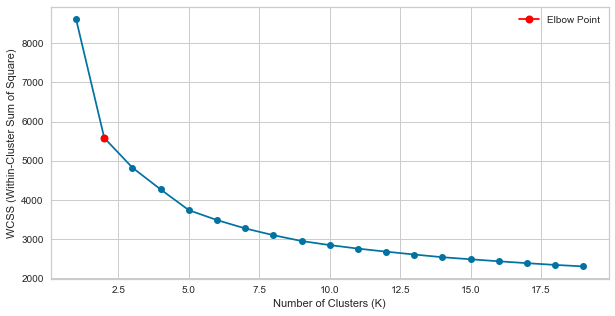

In [31]:
#with 1-20 clusters , drawing the elbow plot
#The graph inidcates the elbow point is at k=2 , but we notice that the line starts to straighten out at k= 5.
evaluate_k_means_elbow_method(dfp[featuresForKMeans],20)

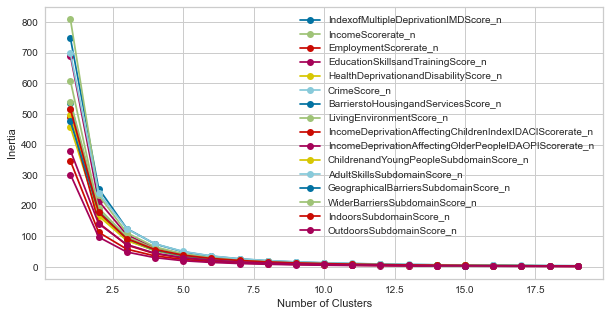

In [32]:
#we matain a random state of 80 through out this evlaution.
#We make further analysis by making an eblow plot for each features
#we notice that the k= 4 seems more like the elnow point
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def optimise_k_means(data, max_k, ax=None):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init=10,random_state=80)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Plot the elbow curve on the given axis (or create a new one)
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(means, inertias, 'o-', label=data.columns[0])
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Inertia')
    ax.grid(True)


# Define the list of column names for the variables
columns = featuresForKMeans

# Create a single plot to display all elbow curves
fig, ax = plt.subplots(figsize=(10, 5))

# Iterate over each column name
for column in columns:
    ds = dfp[[column]]
    optimise_k_means(ds, 20, ax)

ax.legend()
plt.show()


In [35]:
#Next we try to Optimize the K-means Clustering using Silhouette
#From the graph we notice we have a drop at k= 2 but at k=5 we have another peak point before we start seeing a constant decline
#from the evlaution using a silhoutte score, the model has a good score at k = 5.
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def optimise_k_means_sil(data, max_k):
    sil_score = []
    cluster_list = []

    for k in range(2, max_k):  # Changed the range to start from 2
        cluster_list.append(k)
        kmeans = KMeans(n_clusters=k, n_init=10,random_state=80)
        preds = kmeans.fit_predict(data)  # Removed unnecessary parentheses around data
        score = silhouette_score(data, preds)
        sil_score.append(score)

    fig = plt.subplots(figsize=(10,5))
    plt.plot(cluster_list, sil_score, 'o-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Optimization of K-means Clustering using Silhouette')
    plt.show()


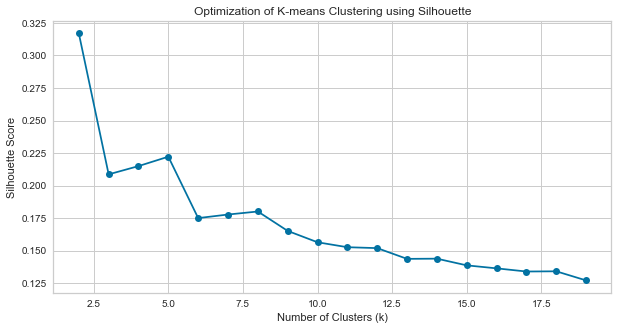

In [36]:
optimise_k_means_sil(dfp[featuresForKMeans], 20)

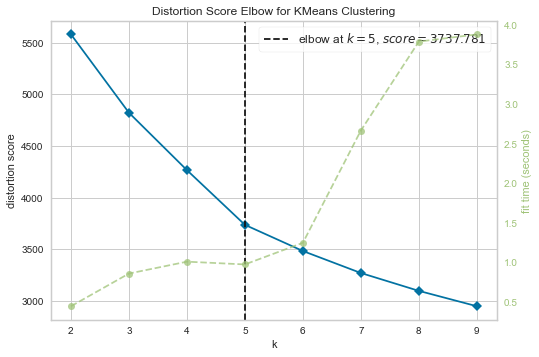

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
#install yellowbrick to vizualize the Elbow curve
#!pip install yellowbrick
#From the graph we compare the elbow plot and silhoutee score
#we noticed that they intersect between k =5 & k =6

from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


X = dfp[featuresForKMeans]

# Instantiate the clustering model and visualizer
km = KMeans(n_clusters=10,n_init=10,random_state=80)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

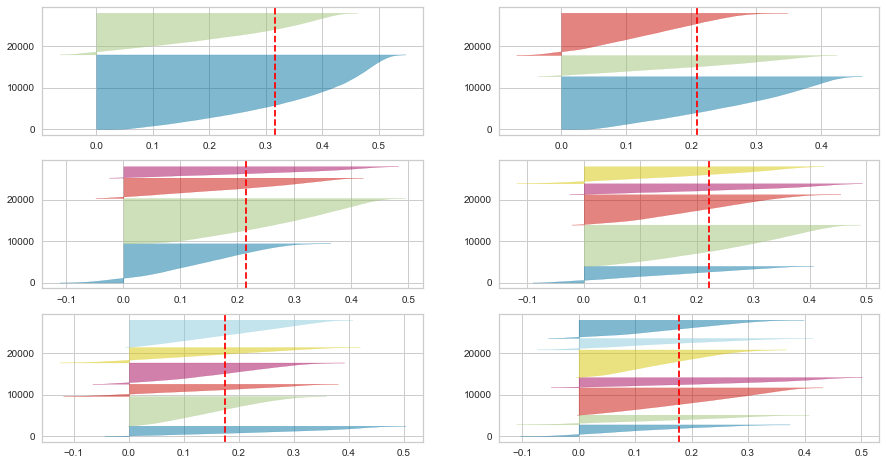

In [37]:
#From the diagram at K= 5
#each cluster has a siloutte score greater than the average silloute score which indicated by a dotted line
# and at k=5 each cluster has almost equal number of siloutte scores
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer


X = dfp[featuresForKMeans]


fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i,n_init=10,random_state=80)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)